In [47]:
import os
import imageio
import numpy as np
from skimage.morphology import disk    # https://scikit-image.org/docs/stable/api/skimage.morphology#skimage.morphology.disk
from scipy.ndimage import convolve

import matplotlib.pyplot as plt
%matplotlib notebook

In [10]:
tiny_bone_file = "data/tiny-bone.png"
assert os.path.exists(tiny_bone_file)

In [38]:
bone_img = imageio.imread(tiny_bone_file).astype(np.float32)

(182, 139)

## pad

In [39]:
conv_kern = np.pad(disk(2), 1, 'constant', constant_values=0)

In [40]:
conv_kern

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

## disk 

In [41]:
disk(2)

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

# simulate measured image (adding some blur)

In [60]:
#measured_img = convolve(bone_img[::-1], conv_kern)
measured_img = convolve(bone_img, conv_kern)

# deconvolution 

In [72]:
dekern = np.fft.ifft2(1/np.fft.fft2(conv_kern))
reconstructed_image = convolve(measured_img, dekern)

# Display results 

<IPython.core.display.Javascript object>


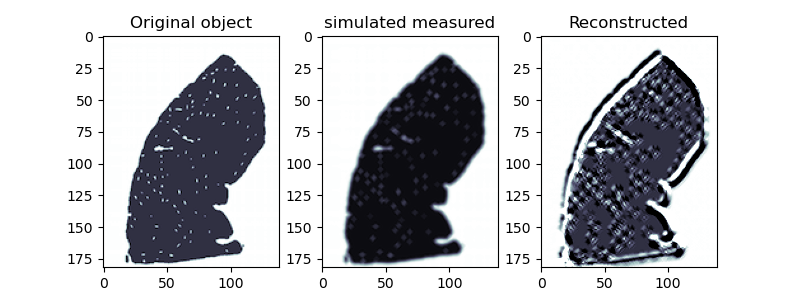

Text(0.5, 1.0, 'Reconstructed')

In [73]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(8,3))
ax0.imshow(bone_img, cmap='bone')
ax0.set_title("Original object")
ax1.imshow(measured_img, cmap='bone')
ax1.set_title("simulated measured")
ax2.imshow(np.real(reconstructed_image), cmap='bone', vmin=0, vmax=255)
ax2.set_title("Reconstructed")
